In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import pandas as pd
import seaborn as sns
import math 
import random

In [33]:
min_price = 10
max_price = 15
current_price = 15

simulation_time = 100 #days

volatility = 0.1 #determines width of min max range
value_scaler = 100 #determines cheapness of stock

last_change = random.choice(["positive", "negative"])
#random.seed(1234)

In [25]:
def define_function(current_price, max_price, min_price):
    use_current_price = current_price
    function_type = random.choice(["sin", "cos"])

    number_of_periods = int(round((1 + random.random())))
    period_length = 24 / number_of_periods
    periodicity = (2 * math.pi) / period_length

    amplitude = ((max_price - min_price) / 100) * random.random()
    
    if function_type == "sin":
        vertical_translation = use_current_price
    elif function_type == "cos":
        vertical_translation = use_current_price

    function = {
        "periodicity": periodicity,
        "amplitude": amplitude,
        "vertical_translation": vertical_translation,
        "function_type": function_type
    }

    return function

In [5]:
def get_price_target(function, time_step, max_price, min_price,):
    if function.get('function_type') == "sin":
        price_target = function.get('amplitude') * math.sin(function.get('periodicity') * time_step) + function.get('vertical_translation')
    elif function.get('function_type') == "cos":
        price_target = function.get('amplitude') * math.cos(function.get('periodicity') * time_step) + function.get('vertical_translation')
    
    rand_pos_change = random.random()
    rand_pos_change_pos_neg = random.random()
    if rand_pos_change < 1:
        if rand_pos_change_pos_neg < 0.5:
            price_target = price_target - ((max_price - min_price) * (random.uniform(0.1, 1.0) / 10) )
        elif rand_pos_change_pos_neg > 0.5:
            price_target = price_target + ((max_price - min_price) * (random.uniform(0.1, 1.0) / 10) )
    
    if price_target < min_price:
        price_target = min_price
    elif price_target > max_price:
        price_target = max_price
        
    return price_target

In [24]:
def update_current_price(current_price, max_price, min_price, price_target):  
    #print(type(current_price))
    global last_change
    new_price = current_price + (price_target - current_price) * random.random() / 100
    rand_pos_change = random.random()
    rand_pos_value = ((max_price - min_price) * (random.uniform(0.1, 1.0) / 10) ) / 100

    if rand_pos_change < 0.1:
        if last_change == "negative":
            last_change = "positive"
        else:
            last_change = "negative"
            
    if last_change == "negative":
        new_price = new_price - rand_pos_value
    elif last_change == "positive":
        new_price = new_price + rand_pos_value

    return new_price

In [7]:
def update_min_max(max_price, min_price, volatility):
    prefered_diff = math.pow(-3.300066 + 3.44987 * math.e, 3.660217 * volatility)
    diff = max_price - min_price
    rand_change_max_value = random.random()
    rand_change_min_value = random.random()
    
    if rand_change_max_value < 0.1:
        if diff > prefered_diff:
            new_max_price = max_price - random.random()
        else:
            new_max_price = max_price + random.random()
    else:
        new_min_price = min_price
        new_max_price = max_price
        
    if rand_change_min_value < 0.1:
        if diff > prefered_diff:
            new_min_price = min_price + random.random()
        else:
            new_min_price = min_price - random.random()
    else:
        new_min_price = min_price
        new_max_price = max_price
        
    if new_min_price > new_max_price:
        new_min_price = min_price
        new_max_price = max_price
        
    if new_min_price < 0:
        new_min_price = min_price
    if new_max_price < 0:
        new_min_price = max_price
    
    return [new_max_price, new_min_price]


In [19]:
def scale_value(value, value_scaler):
    new_value = value / value_scaler
    return new_value

13.062965891555562
14.85329855836306


<AxesSubplot:>

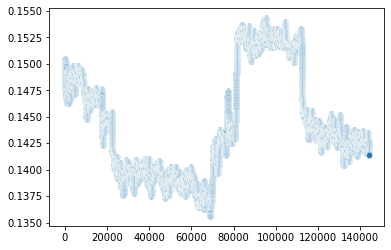

In [34]:
lista = []
listb = []

listc = []
listd = []
time = 0

for q in range(simulation_time):
    function = define_function(current_price, max_price, min_price)
    
    for i in range(24):
        price_target = get_price_target(function, i, max_price, min_price,)
        lista.append(scale_value(price_target, value_scaler))
        listb.append(time)

        for j in range(60):
            current_price = (update_current_price(current_price, max_price, min_price, price_target))
            listc.append(scale_value(current_price, value_scaler))
            listd.append(time)
            time = time + 1
            
        new_min_max_prize = update_min_max(max_price, min_price, volatility)
        max_price = new_min_max_prize[0]
        min_price = new_min_max_prize[1]
        
print(min_price)
print(max_price)
#sns.scatterplot(x=listb, y=lista)
sns.scatterplot(x=listd, y=listc)